In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import itertools
from tqdm import tqdm_notebook as tqdm

In [2]:
data = {}
# Locations in block units
_locations = \
      [(4, 4), # depot
       (2, 0), (8, 0), # locations to visit
       (0, 1), (1, 1),
       (5, 2), (7, 2),
       (3, 3), (6, 3),
       (5, 5), (8, 5),
       (1, 6), (2, 6),
       (3, 7), (6, 7),
       (0, 8), (7, 8)]

demands = [0, # depot
         1, 1, # row 0
         2, 4,
         2, 4,
         8, 8,
         1, 2,
         1, 2,
         4, 4,
         8, 8]

capacities = [15, 15, 15, 15]

time_windows = \
        [(0, 0),
         (75, 85), (75, 85), # 1, 2
         (60, 70), (45, 55), # 3, 4
         (0, 8), (50, 60), # 5, 6
         (0, 10), (10, 20), # 7, 8
         (0, 10), (75, 85), # 9, 10
         (85, 95), (5, 15), # 11, 12
         (15, 25), (10, 20), # 13, 14
         (45, 55), (30, 40)] # 15, 16

In [3]:
G = nx.Graph(instance="Google OR example")

for i in range(len(_locations)):
    G.add_node(i, location=_locations[i], demand=demands[i], time_window=time_windows[i], status=0)

for i in range(len(_locations)):
    for j in range(len(_locations)):
        if i >= j:
            continue
        G.add_edge(i, j,
                   weight=math.sqrt(
                       (_locations[i][0]-_locations[j][0])**2
                       + (_locations[i][1]-_locations[j][1])**2))

In [40]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), 

In [43]:
G.edges.

<bound method Mapping.items of EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (9, 10), (9, 11), (9, 12), (9, 1

/home/ramon/.local/share/virtualenvs/otimgraf-s98R5NnN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


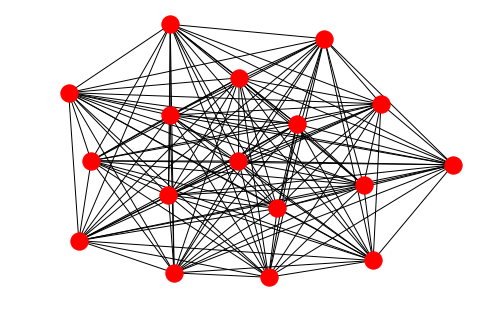

In [58]:
nx.draw(G)

In [59]:
G.get_edge_data(0,4)

{'weight': 4.242640687119285}

In [92]:
for truck in capacities:
    # find nearest unattended customer
    current_node = 0
    nearest_neighbor = None
    min_distance = 9999999999
    print("New route:")
    
    while truck > 0:
        print("current node {}".format(current_node))
        for customer in range(1, len(_locations)):
            print("customer considered {} from node {}".format(customer, current_node))
            if G.node[customer]["status"]:
                continue
            if current_node == customer:
                print("equals")
                continue
            if min_distance > G.get_edge_data(current_node, customer)["weight"]:
                min_distance = G.get_edge_data(current_node, customer)["weight"]
                nearest_neighbor = customer
        current_node = nearest_neighbor
        truck -= G.node[current_node]["demand"]
        G.node[current_node]["status"] = 1
        print("customer {}".format(current_node))
        print("capacity left {}".format(truck))
        min_distance = 9999999999

New route:
current node 0
customer considered 1 from node 0
customer considered 2 from node 0
customer considered 3 from node 0
customer considered 4 from node 0
customer considered 5 from node 0
customer considered 6 from node 0
customer considered 7 from node 0
customer considered 8 from node 0
customer considered 9 from node 0
customer considered 10 from node 0
customer considered 11 from node 0
customer considered 12 from node 0
customer considered 13 from node 0
customer considered 14 from node 0
customer considered 15 from node 0
customer considered 16 from node 0
customer 7
capacity left 7
current node 7
customer considered 1 from node 7
customer considered 2 from node 7
customer considered 3 from node 7
customer considered 4 from node 7
customer considered 5 from node 7
customer considered 6 from node 7
customer considered 7 from node 7
customer considered 8 from node 7
customer considered 9 from node 7
customer considered 10 from node 7
customer considered 11 from node 7
custo

In [5]:
for truck in capacities:
    # find nearest unattended customer
    current_node = 0
    nearest_neighbor = None
    min_distance = 9999999999
    
    max_distance = 0
    furthest_neighbor = None
    
    print("New route:")
    
    for customer in range(1, len(_locations)):
        if G.node[customer]["status"]:
                continue
        if current_node == customer:
            continue
        if max_distance < G.get_edge_data(current_node, customer)["weight"]:
            max_distance = G.get_edge_data(current_node, customer)["weight"]
            furthest_neighbor = customer
    current_node = furthest_neighbor
    truck -= G.node[current_node]["demand"]
    G.node[current_node]["status"] = 1
    
    while truck > 0:
        print("current node {}".format(current_node))
        for customer in range(1, len(_locations)):
            if G.node[customer]["status"]:
                continue
            if current_node == customer:
                print("equals")
                continue
            if min_distance > G.get_edge_data(current_node, customer)["weight"]:
                min_distance = G.get_edge_data(current_node, customer)["weight"]
                nearest_neighbor = customer
        current_node = nearest_neighbor
        truck -= G.node[current_node]["demand"]
        G.node[current_node]["status"] = 1
        print("customer {}".format(current_node))
        print("capacity left {}".format(truck))
        min_distance = 9999999999
    print("back to depot")

New route:
current node 2
customer 6
capacity left 10
current node 6
customer 8
capacity left 2
current node 8
customer 5
capacity left 0
back to depot
New route:
current node 15
customer 11
capacity left 6
current node 11
customer 12
capacity left 4
current node 12
customer 13
capacity left 0
back to depot
New route:
current node 3
customer 4
capacity left 9
current node 4
customer 1
capacity left 8
current node 1
customer 7
capacity left 0
back to depot
New route:
current node 16
customer 14
capacity left 3
current node 14
customer 9
capacity left 2
current node 9
customer 10
capacity left 0
back to depot


In [87]:
type(customer)

int

In [4]:
def all_partitions(collection):
    """Returns the set of all partitions for a given set
     e.g for [1,2], it returns [[1],[2]] and [[1,2]]
     https://stackoverflow.com/questions/19368375/set-partitions-in-python
    """
    if len(collection) == 1:
        yield [collection]
        return
    first = collection[0]
    for smaller in all_partitions(collection[1:]):
        for n, subset in enumerate(smaller):
              yield smaller[:n] + [[first] + subset] + smaller[n + 1:]
        yield [[first]] + smaller

In [14]:
for n, p in enumerate(all_partitions([1,2,3,4]), 1):
    print(n, p)


1 [[1, 2, 3, 4]]
2 [[1], [2, 3, 4]]
3 [[1, 2], [3, 4]]
4 [[2], [1, 3, 4]]
5 [[1], [2], [3, 4]]
6 [[1, 2, 3], [4]]
7 [[2, 3], [1, 4]]
8 [[1], [2, 3], [4]]
9 [[1, 3], [2, 4]]
10 [[3], [1, 2, 4]]
11 [[1], [3], [2, 4]]
12 [[1, 2], [3], [4]]
13 [[2], [1, 3], [4]]
14 [[2], [3], [1, 4]]
15 [[1], [2], [3], [4]]


In [13]:
for n, p in enumerate(all_partitions(range(1, len(G.nodes))), 1):
    print(n, sorted(p))

17

In [9]:
from timeit import default_timer as timer

def find_solution(viable_routes, trucks_left, solution):
    if trucks_left <= 0:
        return

    attended_demand = sum([x[1] for x in solution])
    coverage = set(i for x in solution for i in x[0])

    if attended_demand == total_demand <= total_capacity \
       and len(coverage) == len(G.nodes) - 1:
        total_weight = sum(
            [G.get_edge_data(x[0][i], x[0][i+1])["weight"]
            for x in solution for i in range(len(x[0])-1)])
        print("solution: {}, weight: {}, time: {}".format(
           solution, total_weight, timer() - start))
        return solution

    else:
        return find_solution(viable_routes[1:], trucks_left-1, solution + [viable_routes[0]])

In [10]:
start = timer()
find_solution(viable_routes, trucks_left=len(capacities), solution=[])

NameError: name 'viable_routes' is not defined